<a href="https://colab.research.google.com/github/shamjam/EvbzcY2OC75BRZuM/blob/main/MonReader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project 4: MonReader
MonReader is a mobile application that digitizes books for a user by capturing pages, as they are being flipped by the user.

Our goal in this project is to build a model that predicts if an image of a page shows if the page is being flipped (or not). We will also aim to predict if a given sequence of images contain an action of flipping.

### Project Setup

In [26]:
# Import the necessary packages
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical

import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Set train and test set paths
TRAIN_PATH = "/content/gdrive/MyDrive/Datasets/MonReader/images/training"
TEST_PATH = "/content/gdrive/MyDrive/Datasets/MonReader/images/testing"

### Data Exploration


*   Data is labelled as 'flipping' or 'not flipping'
*   The extracted frames have been stored with the naming structure: *VideoID_FrameNumber*



In [ ]:
train_image_paths_flip = glob.glob(TRAIN_PATH + "/flip/*")
train_image_paths_notflip = glob.glob(TRAIN_PATH + "/notflip/*")
test_image_paths_flip = glob.glob(TEST_PATH + "/flip/*")
test_image_paths_notflip = glob.glob(TEST_PATH + "/notflip/*")

In [ ]:
print(f"There are {len(train_image_paths_flip)} 'flip' images and {len(train_image_paths_notflip)} 'notflip' images in the training set")
print(f"There are {len(test_image_paths_flip)} 'flip' images and {len(test_image_paths_notflip)} 'notflip' images in the testing set")

There are 1162 'flip' images and 1230 'notflip' images in the training set
There are 290 'flip' images and 307 'notflip' images in the testing set


### Design the Model
For an initial benchmark, we will use the LeNet network.

In [ ]:
class LeNet:
  @staticmethod
  def build(width, height, depth, classes):
    # initialize the model
    model = Sequential()
    input_shape = (height, width, depth)

    # first set of CONV => RELU => POOL layers
    model.add(Conv2D(20, (5, 5), padding="same", input_shape=input_shape))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # second set of CONV => RELU => POOL layers
    model.add(Conv2D(50, (5, 5), padding="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # first (and only) set of FC => RELU layers
    model.add(Flatten())
    model.add(Dense(500))
    model.add(Activation("relu"))

    # softmax classifier
    model.add(Dense(classes))
    model.add(Activation("softmax"))

    # return the constructed network architecture
    return model

### Train the Model

In [ ]:
# Initialize the list of data and labels
data = []
labels = []

# Loop over all the images in the training set
for image_path in sorted(train_image_paths_notflip):
  # Load the image
  image = cv2.imread(image_path)

  # Convert it to grayscale, and re-size it
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image, (28, 28))

  # Store the image in the data list
  image = img_to_array(image)
  data.append(image)

  # Store the label of the image in the data list
  labels.append("notflip")

# Do the same for the 'notflip' set
for image_path in sorted(train_image_paths_flip):
  # Load the image
  image = cv2.imread(image_path)

  # Convert it to grayscale, and re-size it
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image, (28, 28))

  # Store the image in the data list
  image = img_to_array(image)
  data.append(image)

  # Store the label of the image in the data list
  labels.append("flip")

In [ ]:
# Scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

# Convert the labels from integers to vectors
le = LabelEncoder().fit(labels)
labels = to_categorical(le.transform(labels), 2)

In [ ]:
# Save the training data
np.save('/content/gdrive/MyDrive/Datasets/MonReader/train_data.npy', data)
np.save('/content/gdrive/MyDrive/Datasets/MonReader/train_labels.npy', labels)

In [ ]:
# Pre-process test set
# Initialize the list of data and labels
test_data = []
test_labels = []

# Loop over all the images in the training set
for image_path in sorted(test_image_paths_notflip):
  # Load the image
  image = cv2.imread(image_path)

  # Convert it to grayscale, and re-size it
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image, (28, 28))

  # Store the image in the data list
  image = img_to_array(image)
  test_data.append(image)

  # Store the label of the image in the data list
  test_labels.append("notflip")

# Do the same for the 'notflip' set
for image_path in sorted(test_image_paths_flip):
  # Load the image
  image = cv2.imread(image_path)

  # Convert it to grayscale, and re-size it
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image, (28, 28))

  # Store the image in the data list
  image = img_to_array(image)
  test_data.append(image)

  # Store the label of the image in the data list
  test_labels.append("flip")

In [ ]:
# Scale the raw pixel intensities to the range [0, 1]
testX = np.array(test_data, dtype="float") / 255.0
labels = np.array(test_labels)

# Convert the labels from integers to vectors
le = LabelEncoder().fit(labels)
testY = to_categorical(le.transform(labels), 2)

# TODO: Try label 0 and 1 for trainY and testY elements

In [ ]:
# Save the testing data
np.save('/content/gdrive/MyDrive/Datasets/MonReader/test_data.npy', testX)
np.save('/content/gdrive/MyDrive/Datasets/MonReader/test_labels.npy', testY)

In [123]:
# Load the training data
data = np.load('/content/gdrive/MyDrive/Datasets/MonReader/train_data.npy')
labels = np.load('/content/gdrive/MyDrive/Datasets/MonReader/train_labels.npy')

In [105]:
# Load the testing data
testX = np.load('/content/gdrive/MyDrive/Datasets/MonReader/test_data.npy')
testY = np.load('/content/gdrive/MyDrive/Datasets/MonReader/test_labels.npy')

In [106]:
(trainX, validX, trainY, validY) = train_test_split(data, labels, test_size=0.20, stratify=labels, shuffle=True, random_state=42)

In [107]:
# Initialize the model
model = LeNet.build(width=28, height=28, depth=1, classes=2)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [108]:
# Train the network
H = model.fit(trainX, trainY, validation_data=(validX, validY), batch_size=64, epochs=15, verbose=1)

Epoch 1/15
30/30 [==============================] - 5s 136ms/step - loss: 0.6864 - accuracy: 0.5525 - val_loss: 0.6687 - val_accuracy: 0.6033
Epoch 2/15
30/30 [==============================] - 4s 131ms/step - loss: 0.6213 - accuracy: 0.6393 - val_loss: 0.5529 - val_accuracy: 0.7307
Epoch 3/15
30/30 [==============================] - 7s 246ms/step - loss: 0.4845 - accuracy: 0.7799 - val_loss: 0.4171 - val_accuracy: 0.8121
Epoch 4/15
30/30 [==============================] - 4s 138ms/step - loss: 0.3332 - accuracy: 0.8772 - val_loss: 0.2820 - val_accuracy: 0.8789
Epoch 5/15
30/30 [==============================] - 4s 131ms/step - loss: 0.2245 - accuracy: 0.9143 - val_loss: 0.2367 - val_accuracy: 0.9207
Epoch 6/15
30/30 [==============================] - 4s 131ms/step - loss: 0.1498 - accuracy: 0.9571 - val_loss: 0.1276 - val_accuracy: 0.9645
Epoch 7/15
30/30 [==============================] - 4s 133ms/step - loss: 0.1229 - accuracy: 0.9582 - val_loss: 0.2261 - val_accuracy: 0.8998
Epoch 

In [109]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(validX, batch_size=64)
print(classification_report(validY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=["notflip", "flip"]))

[INFO] evaluating network...
              precision    recall  f1-score   support

     notflip       1.00      0.98      0.99       233
        flip       0.98      1.00      0.99       246

    accuracy                           0.99       479
   macro avg       0.99      0.99      0.99       479
weighted avg       0.99      0.99      0.99       479



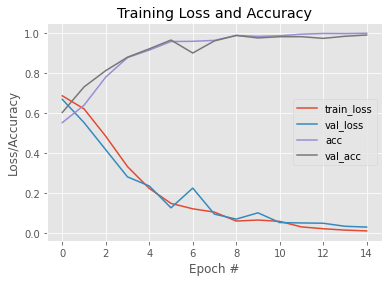

In [111]:
# Plot the training + testing loss and accuracy
epochs=15
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [27]:
# save the model to disk
#print("[INFO] serializing network...")
#model.save("/content/gdrive/MyDrive/Datasets/MonReader")

In [ ]:
#print(predictions.argmax(axis=1))

In [113]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=["notflip", "flip"]))

# save the model to disk
#print("[INFO] serializing network...")
#model.save(args["model"])

[INFO] evaluating network...
              precision    recall  f1-score   support

     notflip       1.00      0.97      0.98       290
        flip       0.97      1.00      0.99       307

    accuracy                           0.98       597
   macro avg       0.99      0.98      0.98       597
weighted avg       0.99      0.98      0.98       597



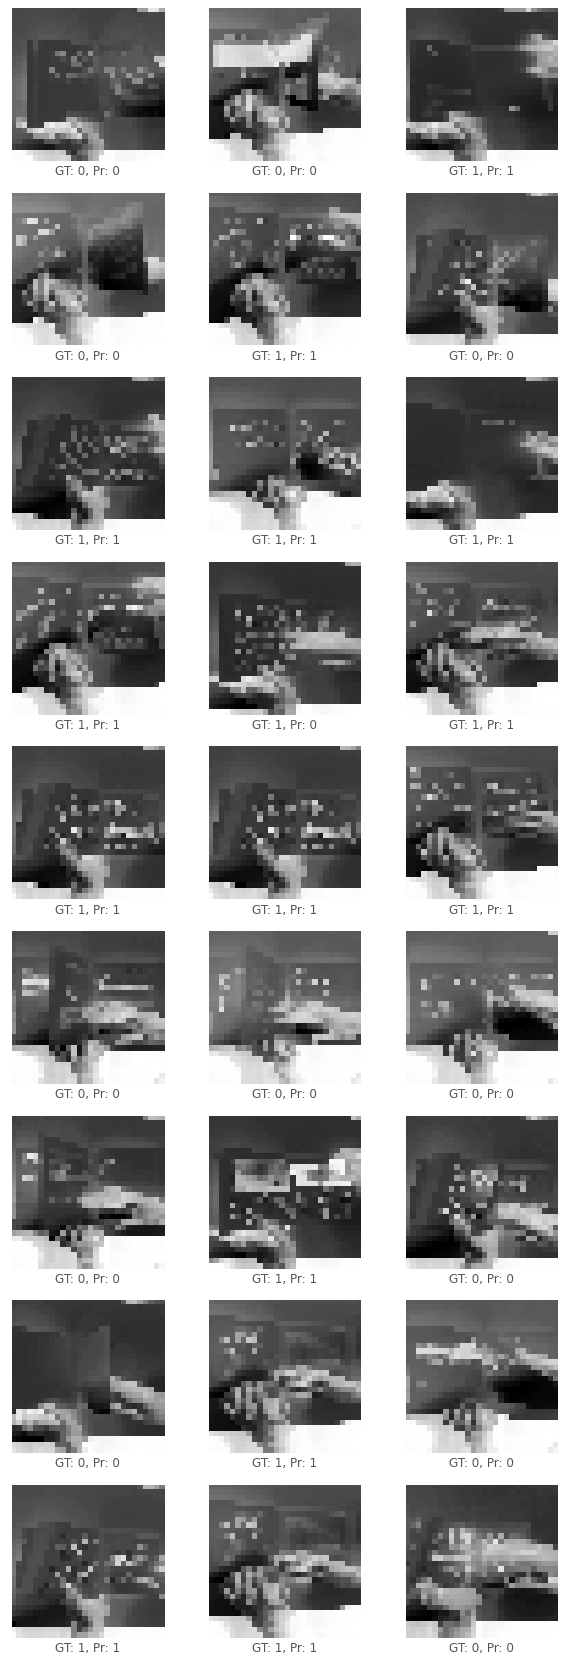

In [41]:
import random

plt.figure(figsize=(10,30))
for i in range(27):
    k = random.randint(1, len(testX)-1)
    plt.subplot(9,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(testX[k][:,:,0], cmap=plt.cm.binary)
    plt.xlabel(f"GT: {testY[k].argmax()}, Pr: {predictions[k].argmax()}")
plt.show()

In [114]:
def predict_image(path=None):
  # Load the image
  image = cv2.imread(path)

  # Show the image
  plt.imshow(image)

  # Convert it to grayscale, and re-size it
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image, (28, 28))

  # Store the image in the data list
  image = img_to_array(image)

  image = np.array([image], dtype="float") / 255.0

  prediction = model.predict(image)

  return le.classes_[prediction.argmax()]

In [122]:
trainY.shape

(1913, 2)

In [121]:
trainY[0]

array([0., 1.], dtype=float32)

'notflip'

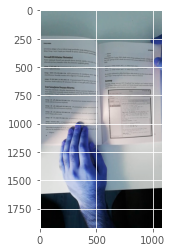

In [115]:
# Make prediction on specific image
predict_image(test_image_paths_notflip[1])

'flip'

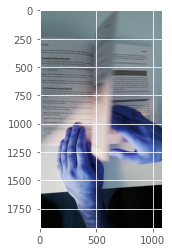

In [117]:
predict_image(test_image_paths_flip[0])

## Predict if a given sequence of images contains an action of flipping

### Method 1: Using the image classification model
We can use the image classification model we have just created to classify each frame of a given video. If 

In [128]:
# Sort into sets/combine frames
test_image_paths_flip_sets = {}
for path in sorted(test_image_paths_flip):
  label = path.split(os.path.sep)[-2].split("_")[0]
  video_number = path.split(os.path.sep)[-1].split("_")[0]
  if video_number not in test_image_paths_flip_sets.keys():
    test_image_paths_flip_sets[video_number] = []
  test_image_paths_flip_sets[video_number].append(path)

test_image_paths_notflip_sets = {}
for path in sorted(test_image_paths_notflip):
  label = path.split(os.path.sep)[-2].split("_")[0]
  video_number = path.split(os.path.sep)[-1].split("_")[0]
  if video_number not in test_image_paths_notflip_sets.keys():
    test_image_paths_notflip_sets[video_number] = []
  test_image_paths_notflip_sets[video_number].append(path)

In [129]:
test_image_paths_flip_sets

{'0001': ['/content/gdrive/MyDrive/Datasets/MonReader/images/testing/flip/0001_000000020.jpg'],
 '0002': ['/content/gdrive/MyDrive/Datasets/MonReader/images/testing/flip/0002_000000012.jpg',
  '/content/gdrive/MyDrive/Datasets/MonReader/images/testing/flip/0002_000000013.jpg',
  '/content/gdrive/MyDrive/Datasets/MonReader/images/testing/flip/0002_000000015.jpg',
  '/content/gdrive/MyDrive/Datasets/MonReader/images/testing/flip/0002_000000017.jpg'],
 '0003': ['/content/gdrive/MyDrive/Datasets/MonReader/images/testing/flip/0003_000000005.jpg',
  '/content/gdrive/MyDrive/Datasets/MonReader/images/testing/flip/0003_000000008.jpg',
  '/content/gdrive/MyDrive/Datasets/MonReader/images/testing/flip/0003_000000022.jpg',
  '/content/gdrive/MyDrive/Datasets/MonReader/images/testing/flip/0003_000000025.jpg'],
 '0004': ['/content/gdrive/MyDrive/Datasets/MonReader/images/testing/flip/0004_000000006.jpg',
  '/content/gdrive/MyDrive/Datasets/MonReader/images/testing/flip/0004_000000013.jpg',
  '/cont

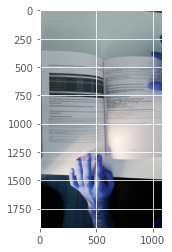

In [130]:
# Make predictions for each set
predictions = []
labels = []
for sequence in test_image_paths_flip_sets:
  sequence_predictions = []
  labels.append("flip")
  for image in test_image_paths_flip_sets[sequence]:
    sequence_predictions.append(predict_image(image))
  predictions.append("flip") if "flip" in sequence_predictions else predictions.append("notflip")

for sequence in test_image_paths_notflip_sets:
  sequence_predictions = []
  labels.append("notflip")
  for image in test_image_paths_notflip_sets[sequence]:
    sequence_predictions.append(predict_image(image))
  predictions.append("flip") if "flip" in sequence_predictions else predictions.append("notflip")

In [131]:
# Convert predictions and labels to vectors
le = LabelEncoder().fit(labels)
labels = to_categorical(le.transform(labels), 2)

le = LabelEncoder().fit(predictions)
predictions = to_categorical(le.transform(predictions), 2)

In [132]:
# Show classification report
print(classification_report(labels.argmax(axis=1),
	predictions.argmax(axis=1), target_names=["notflip", "flip"]))

              precision    recall  f1-score   support

     notflip       0.98      1.00      0.99        63
        flip       1.00      0.98      0.99        52

    accuracy                           0.99       115
   macro avg       0.99      0.99      0.99       115
weighted avg       0.99      0.99      0.99       115



In [ ]:
# TODO: Try on own images/video


## Summary
(TODO)